<a href="https://colab.research.google.com/github/karamalhanatleh/NLP-Tutorial/blob/main/News_classification_using_Gensim_word_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#News classification using Gensim word vectors

In [98]:
#import paskages
import gensim.downloader as api
import spacy

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sn

In [3]:
#load data google news
#100 billion words
wv=api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
#similarity between words
wv.similarity(w1='great' , w2='good')

0.729151

In [5]:
wv_great = wv['great']
wv_good=wv['good']

In [ ]:
wv_good

In [10]:
#load data
df=pd.read_csv('/content/Fake_Real_Data.csv')
df.shape

(9900, 2)

In [11]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [12]:
#print number label value
df.label.value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [13]:
#encoding label
df['label_num']=df.label.map({
    "Fake":0,
    "Real":1

})

In [14]:
#show head data
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [ ]:
!python -m spacy download en_core_web_lg

In [20]:
nlp = spacy.load("en_core_web_lg")


In [69]:
def preprocess_and_vectorize(text):
    """
    Preprocesses the input text using spaCy's language model, removing stop words and punctuation,
    and lemmatizing the remaining tokens.

    Parameters:
    - text (str): The input text to be processed.

    Returns:
    - filtered_tokens (list): List of lemmatized tokens after removing stop words and punctuation.
    """
    # Process the input text using spaCy
    doc = nlp(text)

    # to store filtered tokens
    filtered_tokens = []

    # Iterate through tokens in the processed document
    for token in doc:
        # Exclude punctuation and stop words
        if token.is_punct or token.is_stop:
            continue

        # Lemmatize  token
        filtered_tokens.append(token.lemma_)

    return filtered_tokens


In [70]:
preprocess_and_vectorize("Don't worry if you don't understand")

['worry', 'understand']

In [71]:

preprocess_and_vectorize("I am happy to learn about this new concept")


['happy', 'learn', 'new', 'concept']

In [72]:
v1=wv['worry']
v2=wv['understand']
np.mean([v1,v2],axis=0).shape

(300,)

In [73]:
np.mean([v1,v2],axis=0)[:3]

array([ 0.00976562, -0.00561523, -0.08905029], dtype=float32)

In [74]:
# Calculate the mean vector of the words "worry" and "understand"
wv.get_mean_vector(['worry','understand'])[:3]


array([ 0.00235079, -0.00284596, -0.03638233], dtype=float32)

In [75]:
wv.get_mean_vector(['worry','understand'] , pre_normalize=False)[:3]


array([ 0.00976562, -0.00561523, -0.08905029], dtype=float32)

In [77]:
#edit for return mean vector
def preprocess_and_vectorize(text):
    """
    Preprocesses the input text using spaCy's language model, removing stop words and punctuation,
    and lemmatizing the remaining tokens.

    Parameters:
    - text (str): The input text to be processed.

    Returns:
    - filtered_tokens (list): List of lemmatized tokens after removing stop words and punctuation.
    """

    # Process the input text using spaCy
    doc = nlp(text)

    # to store filtered tokens
    filtered_tokens = []

    # Iterate through tokens in the processed document
    for token in doc:
        # Exclude punctuation and stop words
        if token.is_punct or token.is_stop:
            continue

        # Lemmatize  token
        filtered_tokens.append(token.lemma_)

    # Returning the mean vector of filtered tokens
    return wv.get_mean_vector(filtered_tokens)

In [ ]:
preprocess_and_vectorize("Don't worry if you don't understand")

In [79]:
df['vector']=df['Text'].apply(lambda text:preprocess_and_vectorize(text))

In [80]:
#print head data
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[0.008657642, 0.019024342, -0.011917442, 0.032..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[0.010864096, 0.007960429, 0.0011915653, 0.014..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[0.018134918, 0.0062743523, -0.005872244, 0.03..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[0.01255197, 0.012613623, 5.9780963e-05, 0.021..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.0019059887, 0.011889367, 0.0035395357, 0.0..."


In [82]:
 #split data

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2024,
    stratify = df.label_num)


reshapeing split data

In [83]:
print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)

X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

Shape of X_train before reshaping:  (7920,)
Shape of X_test before reshaping:  (1980,)


In [84]:
X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

In [85]:
print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train after reshaping:  (7920, 300)
Shape of X_test after reshaping:  (1980, 300)


Train Model

In [88]:
#create model
model_boosting = GradientBoostingClassifier()

In [89]:
#fit model
model_boosting.fit(X_train_2d , y_train)

GradientBoostingClassifier()

In [90]:
#prediction for test data
y_pred= model_boosting.predict(X_test_2d)

In [92]:
#print  classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1000
           1       0.97      0.99      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



In [93]:
#try Make some predictions
test_news = [
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]



In [94]:
test_news_vectors=[preprocess_and_vectorize(n) for n in test_news]

In [95]:
model_boosting.predict(test_news_vectors)


array([1, 0, 0])

In [97]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[970,  30],
       [ 12, 968]])

Text(95.72222222222221, 0.5, 'Truth')

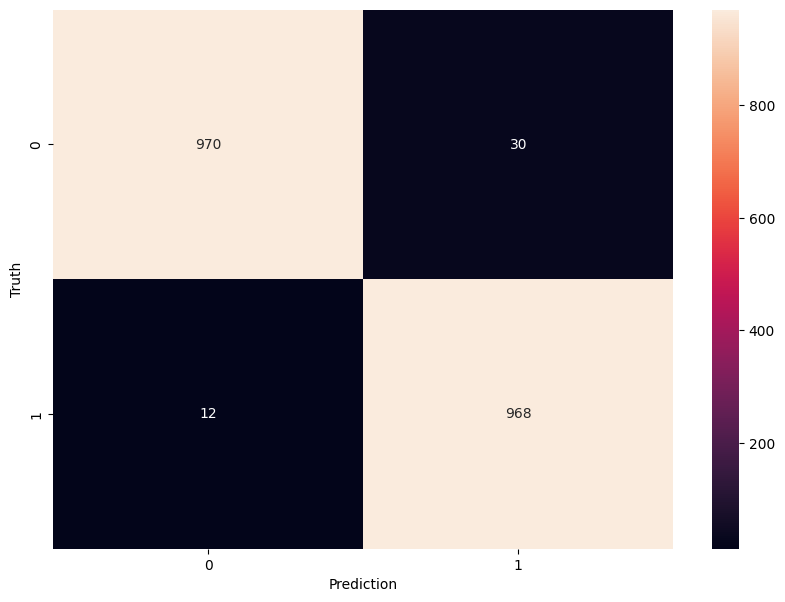

In [99]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [51]:
#just for test

doc = nlp('Karam is a students and he is a serach for working!!')

# Iterate through the tokens and print those that are not stop words and not punctuation
for token in doc:
        print(token.lemma_)


Karam
be
a
student
and
he
be
a
serach
for
work
!
!
